## Hello Guys!

Here we are going to create a Convolution Neural Network(CNN) model on **Identification of Pseudo papilledema dataset** which is used to for identification of Pseudo papilledema.

## Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset.
The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix. 

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt

## Importing data into tensorflow dataset object

### Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.<br/>
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image. 

In [2]:
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '../input/dataset/output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 1095 images belonging to 3 classes.


In [3]:
count=0
for image_batch, label_batch in train_generator:
#   print(label_batch)
    print(image_batch[0])
    break

[[[0.3931074  0.2597741  0.16173485]
  [0.3926774  0.25934404 0.16130485]
  [0.39224738 0.25891405 0.16087481]
  ...
  [0.6613769  0.42000288 0.21471304]
  [0.65812814 0.41499087 0.21499085]
  [0.6509804  0.40784317 0.20784315]]

 [[0.3988591  0.25996447 0.16192523]
  [0.39756906 0.26125452 0.1632153 ]
  [0.396279   0.26254457 0.16450535]
  ...
  [0.6626669  0.4208629  0.21686313]
  [0.6564081  0.4132708  0.21327077]
  [0.6509804  0.40784317 0.20784315]]

 [[0.40513343 0.2509804  0.15203793]
  [0.4064235  0.2509804  0.15246797]
  [0.40771356 0.2509804  0.15289798]
  ...
  [0.663957   0.42172295 0.21901323]
  [0.65468794 0.41155073 0.21155071]
  [0.6509804  0.40784317 0.20784315]]

 ...

 [[0.40008643 0.21577269 0.1138119 ]
  [0.40772584 0.22352943 0.12149043]
  [0.38433832 0.22352943 0.10589874]
  ...
  [0.6983974  0.4059916  0.19030534]
  [0.7005475  0.40900174 0.19331546]
  [0.70269763 0.4120119  0.1963256 ]]

 [[0.40094647 0.21663272 0.11467194]
  [0.40514573 0.22352943 0.11977035]


In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['Normal', 'Papilledema', 'Pseudopapilledema']

In [5]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '../input/dataset/output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 274 images belonging to 3 classes.


In [6]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  ...
  [7.7665424e-01 4.7772053e-01 3.2246312e-01]
  [7.6862752e-01 4.8374027e-01 3.1764707e-01]
  [7.6173055e-01 4.9019611e-01 3.1534809e-01]]

 [[5.0160424e-03 5.0160424e-03 5.0160424e-03]
  [4.7562993e-03 4.7562993e-03 4.7562993e-03]
  [4.4965567e-03 4.4965567e-03 4.4965567e-03]
  ...
  [7.7535552e-01 4.7720104e-01 3.2168388e-01]
  [7.6862752e-01 4.8477924e-01 3.1764707e-01]
  [7.6095122e-01 4.9019611e-01 3.1508833e-01]]

 [[6.7572757e-03 6.7572757e-03 6.7572757e-03]
  [7.0170183e-03 7.0170183e-03 7.0170183e-03]
  [7.2767613e-03 7.2767613e-03 7.2767613e-03]
  ...
  [7.7405679e-01 4.7668156e-01 3.2090464e-01]
  [7.6862752e-01 4.8581821e-01 3.1764707e-01]
  [7.6017201e-01 4.9019611e-01 3.1482860e-01]]

 ...

 [[5.6637649e-04 5.6637649e-04 5.6637649e-04]
  [3.9215689e-03 3.9215689e-03 3.3638037e-03]
  [3.9215689e-03 3.9215689e-03 0.0000000e+00]
  ..

# Methods:
#### a. First we will use CNN model by creating our own layers and then test on it.
#### b. Then we will use transfer Learning with pretrained VGG16 model.
#### c. At last we will use pretrained MobNetV2 model.

## a. Creating the CNN model

### How to stack up layers?

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected layers. When these layers are stacked, a CNN architecture will be formed.<br/>
**Convolution->Relu->Pooling->Convolution->Relu->Pooling->Flattening->Fully Connected layer**

CNN Layer-This layer is the first layer that is used to extract the various features from the input images.

Pooling layer-It is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

Fully Connected layer-It consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.

Dropout-To overcome overfitting problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.

Relu Activation Function-It decides which information of the model should be send in the forward direction and which ones should not at the end of the network.

In [7]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax')) # softmax for more than 2

2022-09-02 08:14:23.337155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 08:14:23.440250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 08:14:23.441145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 08:14:23.442902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2764896   
_________________________________________________________________
dropout (Dropout)            (None, 96)                0

### Compiling the model

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,validation_data=test_generator,epochs=20)

2022-09-02 08:14:26.311797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-09-02 08:14:27.756194: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


35/35 [==============================] - 17s 288ms/step - loss: 0.8368 - accuracy: 0.6091 - val_loss: 0.6961 - val_accuracy: 0.7153
Epoch 2/20
35/35 [==============================] - 7s 212ms/step - loss: 0.6449 - accuracy: 0.7306 - val_loss: 0.6767 - val_accuracy: 0.7299
Epoch 3/20
35/35 [==============================] - 7s 213ms/step - loss: 0.5876 - accuracy: 0.7534 - val_loss: 0.4850 - val_accuracy: 0.8212
Epoch 4/20
35/35 [==============================] - 7s 203ms/step - loss: 0.5268 - accuracy: 0.7909 - val_loss: 0.4119 - val_accuracy: 0.7993
Epoch 5/20
35/35 [==============================] - 8s 233ms/step - loss: 0.4778 - accuracy: 0.8119 - val_loss: 0.4121 - val_accuracy: 0.8650
Epoch 6/20
35/35 [==============================] - 7s 211ms/step - loss: 0.4179 - accuracy: 0.8274 - val_loss: 0.3534 - val_accuracy: 0.8394
Epoch 7/20
35/35 [==============================] - 7s 202ms/step - loss: 0.3950 - accuracy: 0.8484 - val_loss: 0.3861 - val_accuracy: 0.8431
Epoch 8/20
35/35

In [11]:
scores = model.evaluate(test_generator)

9/9 [==============================] - 1s 152ms/step - loss: 0.2205 - accuracy: 0.9124


In [12]:
scores

[0.2205134630203247, 0.9124087691307068]

### Plotting the accuracy and loss curves

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

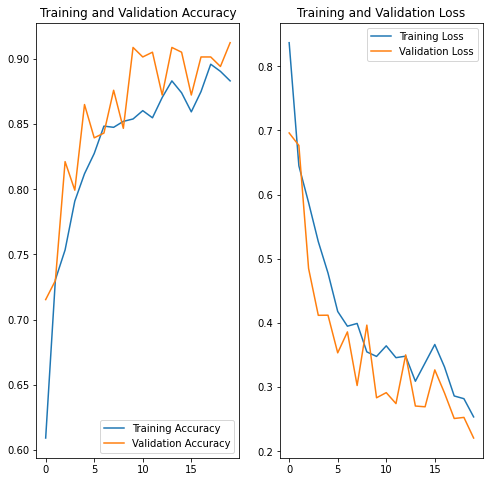

In [14]:
import matplotlib.pyplot as plt
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the prediction on sample of image from test dataset

In [15]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

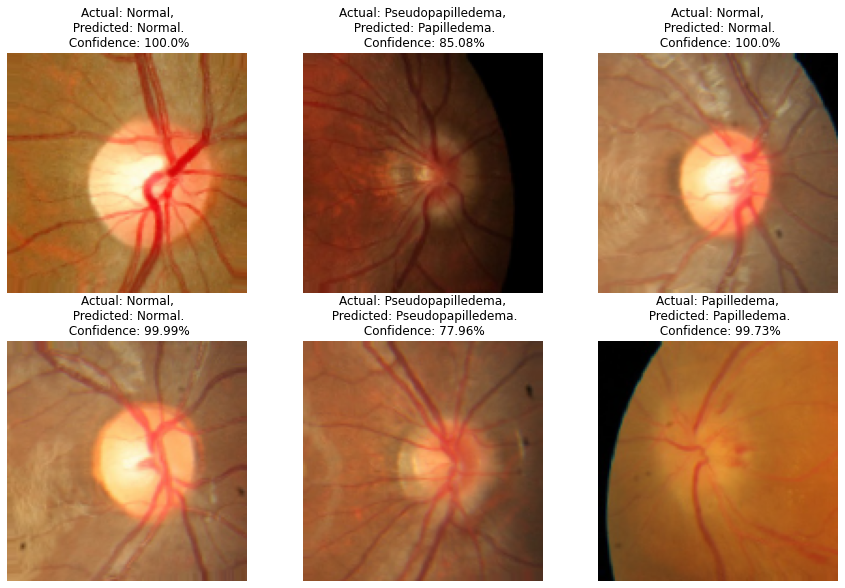

In [16]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Thus, here we get an accuracy of 91.24%.

## b. VGG16 Pretrained Model

VGG16 is a convolution neural net (CNN ) architecture trained on imagenet dataset. 

It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. 

It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights.

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

vgg_model = VGG16(include_top=False, input_shape=(128, 128, 3))

for layer in vgg_model.layers:
    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(3, activation='sigmoid')(class1)

model = Model(inputs = vgg_model.inputs, outputs = output)

58900480/58889256 [==============================] - 0s 0us/step


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Compiling the model

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [20]:
history = model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20
35/35 [==============================] - 10s 244ms/step - loss: 0.7937 - accuracy: 0.7516 - val_loss: 0.3163 - val_accuracy: 0.8686
Epoch 2/20
35/35 [==============================] - 8s 232ms/step - loss: 0.2898 - accuracy: 0.8968 - val_loss: 0.3088 - val_accuracy: 0.8650
Epoch 3/20
35/35 [==============================] - 8s 217ms/step - loss: 0.2479 - accuracy: 0.9032 - val_loss: 0.2685 - val_accuracy: 0.8869
Epoch 4/20
35/35 [==============================] - 7s 215ms/step - loss: 0.2028 - accuracy: 0.9233 - val_loss: 0.2438 - val_accuracy: 0.9051
Epoch 5/20
35/35 [==============================] - 7s 205ms/step - loss: 0.2029 - accuracy: 0.9233 - val_loss: 0.2459 - val_accuracy: 0.9161
Epoch 6/20
35/35 [==============================] - 8s 232ms/step - loss: 0.1572 - accuracy: 0.9406 - val_loss: 0.2202 - val_accuracy: 0.9234
Epoch 7/20
35/35 [==============================] - 7s 214ms/step - loss: 0.1507 - accuracy: 0.9416 - val_loss: 0.2646 - val_accuracy: 0.9088
Epoch

In [21]:
scores = model.evaluate(test_generator)

9/9 [==============================] - 1s 158ms/step - loss: 0.2165 - accuracy: 0.9307


In [22]:
scores

[0.21645765006542206, 0.930656909942627]

### Plotting the accuracy and loss curves

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

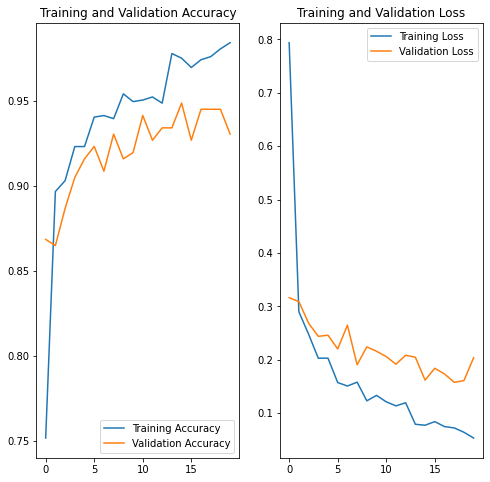

In [24]:
import matplotlib.pyplot as plt
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the prediction on sample of image from test dataset

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

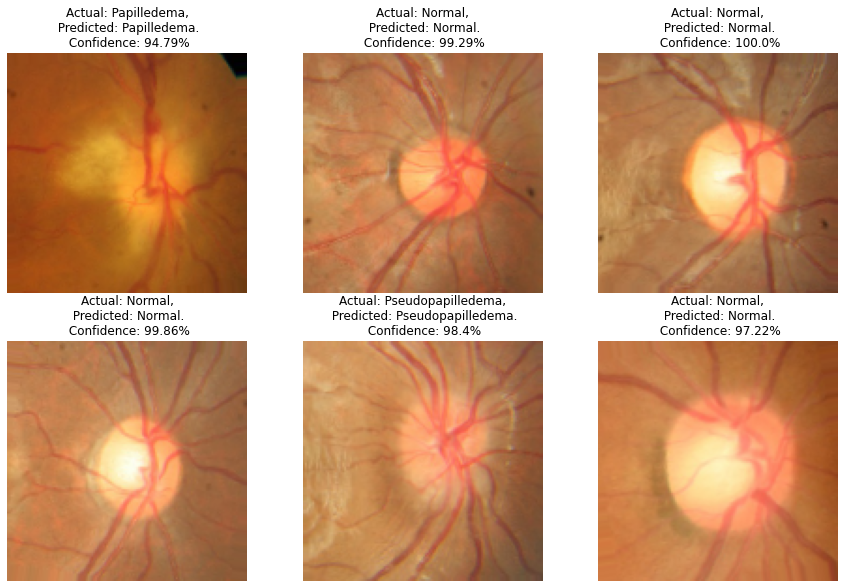

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Thus, here we get an accuracy of 93.07%.

## c. MobileNetV2 Pretrained Model

In this experiment we will use a pre-trained MobileNetV2 Tensorflow model to classify images. This model is trained using the ImageNet dataset.

MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.

Pipe the dataset to a model Fetch a copy of MobileNet v2 from tf.keras.applications.

In [27]:

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model

mobnet_model = MobileNetV2(include_top=False, input_shape=(128, 128, 3))

for layer in mobnet_model.layers:
    layer.trainable=False

flat1 = Flatten()(mobnet_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(3, activation='sigmoid')(class1)

model = Model(inputs = mobnet_model.inputs, outputs = output)

9420800/9406464 [==============================] - 0s 0us/step


In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

### Compiling the model

In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [30]:
history = model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20
35/35 [==============================] - 11s 249ms/step - loss: 1.6908 - accuracy: 0.8420 - val_loss: 0.5891 - val_accuracy: 0.8942
Epoch 2/20
35/35 [==============================] - 8s 215ms/step - loss: 0.3965 - accuracy: 0.9233 - val_loss: 0.3780 - val_accuracy: 0.9124
Epoch 3/20
35/35 [==============================] - 7s 215ms/step - loss: 0.1205 - accuracy: 0.9598 - val_loss: 0.1621 - val_accuracy: 0.9489
Epoch 4/20
35/35 [==============================] - 7s 202ms/step - loss: 0.1624 - accuracy: 0.9626 - val_loss: 0.2048 - val_accuracy: 0.9343
Epoch 5/20
35/35 [==============================] - 7s 211ms/step - loss: 0.0757 - accuracy: 0.9753 - val_loss: 0.2079 - val_accuracy: 0.9416
Epoch 6/20
35/35 [==============================] - 8s 229ms/step - loss: 0.0986 - accuracy: 0.9689 - val_loss: 0.2445 - val_accuracy: 0.9489
Epoch 7/20
35/35 [==============================] - 7s 199ms/step - loss: 0.0717 - accuracy: 0.9817 - val_loss: 0.2429 - val_accuracy: 0.9380
Epoch

In [31]:
scores = model.evaluate(test_generator)

9/9 [==============================] - 1s 155ms/step - loss: 0.3286 - accuracy: 0.9270


In [32]:
scores

[0.3286019563674927, 0.9270073175430298]

### Plotting the accuracy and loss curves

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

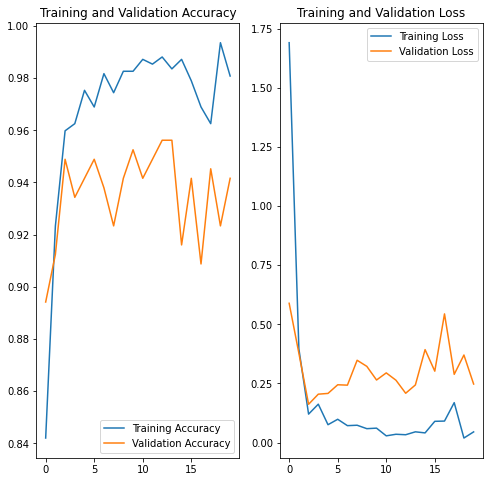

In [34]:
import matplotlib.pyplot as plt
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the prediction on sample of image from test dataset

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

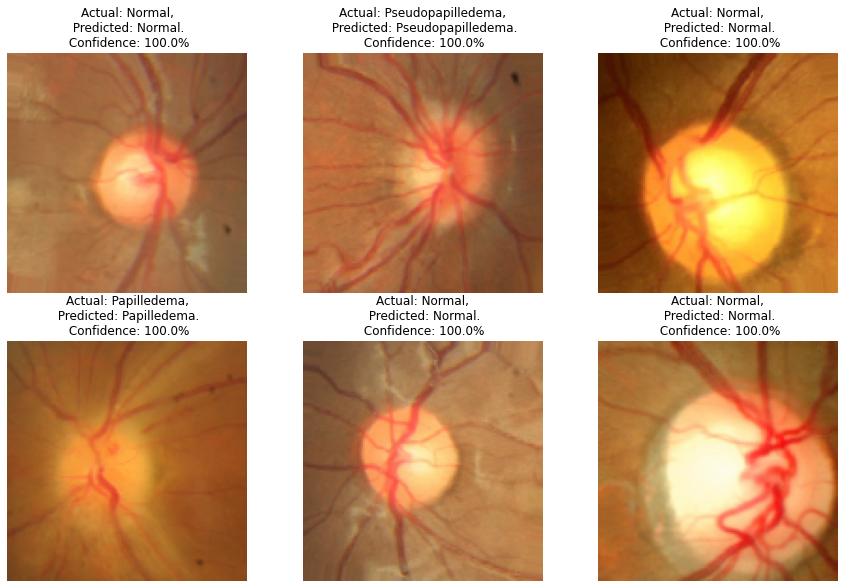

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Thus, here we get an accuracy of 92.7%.

#### At an average all of the three model perform very well. As here we trained for 20 epoch only, you can train it for more epoch and get more good model.

Author Github Link - https://github.com/kshitij192
## Thank You